In [1]:
using OrdinaryDiffEq, LinearAlgebra, ForwardDiff, PyPlot, ChaosTools, DynamicalSystems, Distributions, BenchmarkTools, StaticArrays, RandomNumbers, DSP

In [58]:
using Pkg
Pkg.add("StaticArrays")
Pkg.add("BenchmarkTools")
Pkg.add("DSP")

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
  [717857b8] + DSP v0.6.3
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


# Calculo para las energías de los osciladores y su frecuencia

In [15]:
Hosci(x,p)=p*p/(2. *0.1)+0.5*0.1*0.6324555320336759^2. *x^2.
println(Hosci(6,0.3))
freq(x,p,E)=sqrt((E-p*p/(2. *0.1))/(0.5*0.1*x*x*0.6324555320336759^2.))
println(freq(6.,0.3,Hosci(5,0.25)))

1.1700000000000002
0.7095577652469335


# Tres osciladores

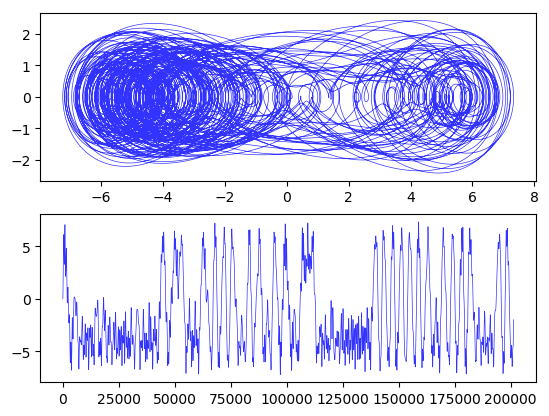

 11.080426 seconds (186.49 M allocations: 5.338 GiB, 16.14% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e1d2ab780>

In [19]:
initial_position = [0.1, 0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=8000.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
m[4]=0.1
w[2]=0.6324555320336759
g[2]=0.07
w[3]=0.6324555320336759*1.2639842760097928
g[3]=0.07
w[4]=0.6324555320336759*0.6925256939166184
g[4]=0.07

dts=0.001*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=5.#Xz0[jj]
initial_momentum[2]=0.25#Pz1[jj]
initial_position[3]=4.#Xz0[jj]
initial_momentum[3]=0.2#Pz1[jj]
initial_position[4]=7.#Xz0[jj]
initial_momentum[4]=0.35#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol4 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol4[5,:],sol4[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol4.t[:],sol4[5,:],color="b",linewidth=0.5,alpha=0.8)

195.

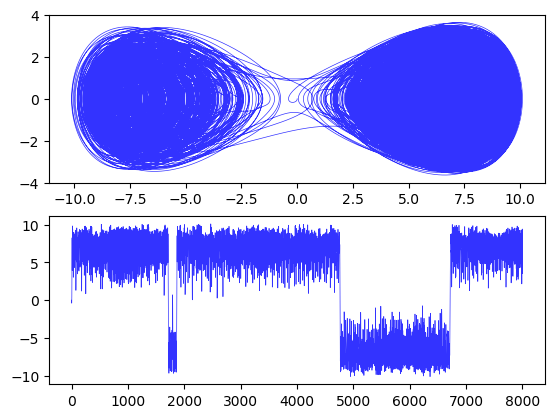

000827 seconds (555.76 M allocations: 18.508 GiB, 66.79% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb7e91849b0>

In [44]:
initial_position = [0.1, 0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=8000.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
m[4]=0.1
w[2]=0.6324555320336759
g[2]=0.03
w[3]=0.6324555320336759/2.
g[3]=0.05
w[4]=0.6324555320336759*2.
g[4]=0.07

dts=0.001*2. *pi/W
#Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) 
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2.  +q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=5.35#Xz0[jj]
initial_momentum[2]=0.27#Pz1[jj]
initial_position[3]=0.#Xz0[jj]
initial_momentum[3]=-0.27#Pz1[jj]
initial_position[4]=0.#Xz0[jj]
initial_momentum[4]=0.#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol1 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol1[5,:],sol1[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol1.t[:],sol1[5,:],color="b",linewidth=0.5,alpha=0.8)

# Cuatro osciladores

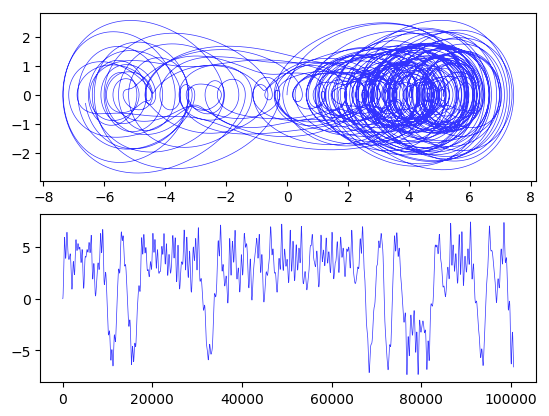

  8.217179 seconds (120.19 M allocations: 4.052 GiB, 17.57% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e1d09e940>

In [23]:
initial_position = [0.1, 0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=1000.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
m[4]=0.1
w[2]=0.6324555320336759
g[2]=0.07
w[3]=0.6324555320336759*1.2639842760097928
g[3]=0.07
w[4]=0.6324555320336759*0.6925256939166184
g[4]=0.07
w[5]=0.6324555320336759*1.9720265943665387
g[5]=0.07

dts=0.001*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=5.#Xz0[jj]
initial_momentum[2]=0.25#Pz1[jj]
initial_position[3]=4.#Xz0[jj]
initial_momentum[3]=0.2#Pz1[jj]
initial_position[4]=7.#Xz0[jj]
initial_momentum[4]=0.35#Pz1[jj]
initial_position[5]=3.#Xz0[jj]
initial_momentum[5]=0.15#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol4 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol4[6,:],sol4[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol4[6,:],color="b",linewidth=0.5,alpha=0.8)

# Cinco osciladores

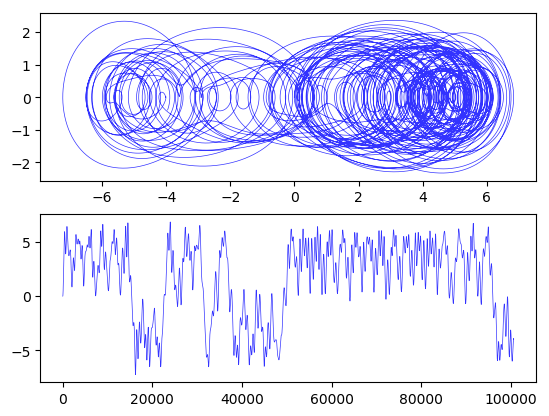

  9.614620 seconds (145.60 M allocations: 4.936 GiB, 13.86% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8e1cbc36a0>

In [26]:
initial_position = [0.1, 0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=1000.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
m[4]=0.1
w[2]=0.6324555320336759
g[2]=0.07
w[3]=0.6324555320336759*1.2639842760097928
g[3]=0.07
w[4]=0.6324555320336759*0.6925256939166184
g[4]=0.07
w[5]=0.6324555320336759*1.9720265943665387
g[5]=0.07
w[6]=0.6324555320336759*3.087272258807117
g[6]=0.07

dts=0.001*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=5.#Xz0[jj]
initial_momentum[2]=0.25#Pz1[jj]
initial_position[3]=4.#Xz0[jj]
initial_momentum[3]=0.2#Pz1[jj]
initial_position[4]=7.#Xz0[jj]
initial_momentum[4]=0.35#Pz1[jj]
initial_position[5]=3.#Xz0[jj]
initial_momentum[5]=0.15#Pz1[jj]
initial_position[6]=2.#Xz0[jj]
initial_momentum[6]=0.1#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol4 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol4[7,:],sol4[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol4[7,:],color="b",linewidth=0.5,alpha=0.8)

# Seis osciladores

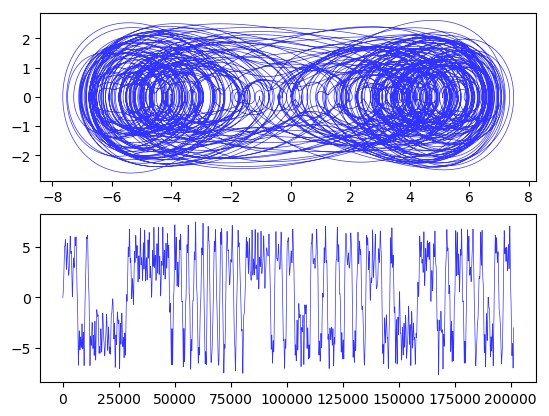

 19.682686 seconds (338.81 M allocations: 13.143 GiB, 16.92% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb8918cf048>

In [13]:
initial_position = [0.1, 0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=2000.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
m[4]=0.1
w[2]=0.6324555320336759*0.6925256939166184
g[2]=0.04
w[3]=0.6324555320336759
g[3]=0.07
w[4]=0.6324555320336759
g[4]=0.04
w[5]=0.6324555320336759*1.2639842760097928
g[5]=0.07
w[6]=0.6324555320336759*1.9720265943665387
g[6]=0.04
w[7]=0.6324555320336759*3.087272258807117
g[7]=0.07

dts=0.001*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=7.#Xz0[jj]
initial_momentum[2]=0.35#Pz1[jj]
initial_position[3]=5.#Xz0[jj]
initial_momentum[3]=-0.25#Pz1[jj]
initial_position[4]=-5.#Xz0[jj]
initial_momentum[4]=-0.25#Pz1[jj]
initial_position[5]=-4.#Xz0[jj]
initial_momentum[5]=0.20#Pz1[jj]
initial_position[6]=3.#Xz0[jj]
initial_momentum[6]=0.15#Pz1[jj]
initial_position[7]=2.#Xz0[jj]
initial_momentum[7]=-0.1#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol4 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol4[8,:],sol4[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol4[8,:],color="b",linewidth=0.5,alpha=0.8)

# Siete osciladores

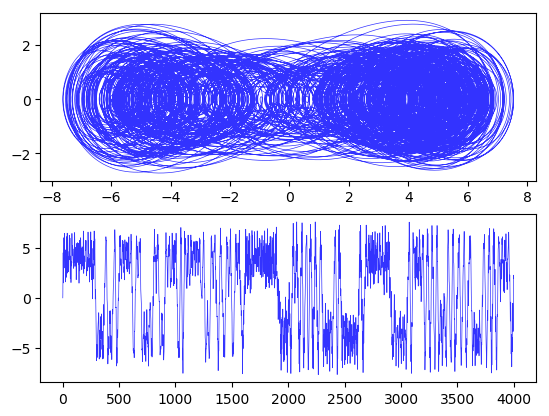

 58.573620 seconds (775.92 M allocations: 30.234 GiB, 17.07% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb8900626d8>

In [30]:
initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=4000.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
m[4]=0.1
w[2]=0.6324555320336759*0.6925256939166184
g[2]=0.04
w[3]=0.6324555320336759
g[3]=0.07
w[4]=0.6324555320336759
g[4]=0.04
w[5]=0.6324555320336759*1.2639842760097928
g[5]=0.07
w[6]=0.6324555320336759*1.9720265943665387
g[6]=0.04
w[7]=0.6324555320336759*3.087272258807117
g[7]=0.07
w[8]=0.6324555320336759*0.7095577652469335
g[8]=0.07

dts=0.001*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=7.#Xz0[jj]
initial_momentum[2]=0.35#Pz1[jj]
initial_position[3]=5.#Xz0[jj]
initial_momentum[3]=0.25#Pz1[jj]
initial_position[4]=5.#Xz0[jj]
initial_momentum[4]=-0.25#Pz1[jj]
initial_position[5]=4.#Xz0[jj]
initial_momentum[5]=0.20#Pz1[jj]
initial_position[6]=3.#Xz0[jj]
initial_momentum[6]=0.15#Pz1[jj]
initial_position[7]=2.#Xz0[jj]
initial_momentum[7]=0.1#Pz1[jj]
initial_position[8]=6.#Xz0[jj]
initial_momentum[8]=-0.3#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol4 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol4[9,:],sol4[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol4.t[:], sol4[9,:], color="b",linewidth=0.5,alpha=0.8)

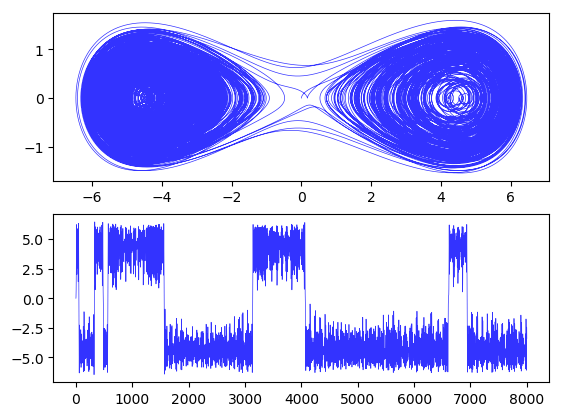

103.345167 seconds (1.55 G allocations: 60.319 GiB, 16.54% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb7e9456588>

In [40]:
initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=8000.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
m[4]=0.1
w[2]=0.6324555320336759*0.6925256939166184
g[2]=0.01
w[3]=0.6324555320336759
g[3]=0.01
w[4]=0.6324555320336759
g[4]=0.01
w[5]=0.6324555320336759*1.2639842760097928
g[5]=0.01
w[6]=0.6324555320336759*1.9720265943665387
g[6]=0.01
w[7]=0.6324555320336759*3.087272258807117
g[7]=0.01
w[8]=0.6324555320336759*0.7095577652469335
g[8]=0.01

dts=0.001*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=0.#Xz0[jj]
initial_momentum[2]=0.#Pz1[jj]
initial_position[3]=5.#Xz0[jj]
initial_momentum[3]=0.25#Pz1[jj]
initial_position[4]=0.#Xz0[jj]
initial_momentum[4]=0.#Pz1[jj]
initial_position[5]=0.#Xz0[jj]
initial_momentum[5]=0.#Pz1[jj]
initial_position[6]=0.#Xz0[jj]
initial_momentum[6]=0.#Pz1[jj]
initial_position[7]=0.#Xz0[jj]
initial_momentum[7]=0.#Pz1[jj]
initial_position[8]=0.#Xz0[jj]
initial_momentum[8]=-0.#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol4 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol4[9,:],sol4[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol4.t[:], sol4[9,:], color="b",linewidth=0.5,alpha=0.8)

In [3]:
subplot(2, 2, 1)
title("7 oscillators")
plot(sol4[9,:],sol4[1,:],color="b",linewidth=0.2,alpha=0.8)
subplot(2, 2, 3)
plot(sol4.t[:], sol4[9,:], color="b",linewidth=0.2,alpha=0.8)
subplot(2, 2, 2)
title("3 oscillators")
plot(sol1[5,:],sol1[1,:],color="b",linewidth=0.2,alpha=0.8)
subplot(2, 2, 4)
plot(sol1.t[:], sol1[5,:], color="b",linewidth=0.2,alpha=0.8)

UndefVarError: UndefVarError: sol4 not defined

# Ocho osciladores

In [5]:
function initial_sampling(E,w,m,M)
    nums=rand(1)*2*pi
    x=cos(nums[1])*sqrt(E/(0.5*M*w*w))
    y=sin(nums[1])*sqrt(2*m*E)
    return x,y
end

function bolz_energy()
    return rand(Truncated(Exponential(1), 0.1, 3))

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

time=100.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[2]=0.6324555320336759-0.2001
g[2]=0.02
w[3]=0.6324555320336759-0.2
g[3]=0.01
w[4]=0.6324555320336759-0.1001
g[4]=0.04
w[5]=0.6324555320336759-0.1
g[5]=0.01
w[6]=0.6324555320336759+0.2001
g[6]=0.06
w[7]=0.6324555320336759+0.2
g[7]=0.07
w[8]=0.6324555320336759+0.1001
g[8]=0.04
w[9]=0.6324555320336759+0.1
g[9]=0.02

W=maximum(w)

dts=0.001*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=1.#Xz0[jj]
initial_momentum[2]=0.05#Pz1[jj]
initial_position[3]=-1.#Xz0[jj]
initial_momentum[3]=-0.05#Pz1[jj]
initial_position[4]=-1.5#Xz0[jj]
initial_momentum[4]=0.075#Pz1[jj]
initial_position[5]=1.5#Xz0[jj]
initial_momentum[5]=-0.075#Pz1[jj]
initial_position[6]=0.5#Xz0[jj]
initial_momentum[6]=0.025#Pz1[jj]
initial_position[7]=-0.5#Xz0[jj]
initial_momentum[7]=-0.025#Pz1[jj]
initial_position[8]=-2.#Xz0[jj]
initial_momentum[8]=0.1#Pz1[jj]
initial_position[9]=2.#Xz0[jj]
initial_momentum[9]=-0.1#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol8 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol8[10,:],sol8[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol8.t[:], sol8[10,:], color="b",linewidth=0.5,alpha=0.8)

LoadError: syntax: incomplete: "function" at none:2 requires end

[1.6933754699572323, 0.1651799681792703, 0.7171923713266922, 0.4169747661878527, 0.9230392171865304, 0.6134461156673227, 0.5129569174602183, 0.06966217876294095, 0.6180948652334598]
 

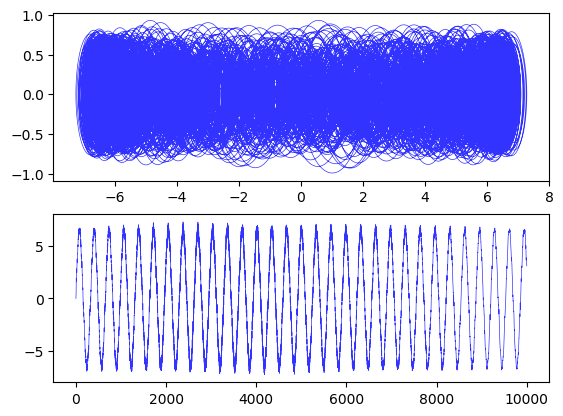

42.375159 seconds (588.47 M allocations: 25.849 GiB, 15.18% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x23d2b0c50>

In [50]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(1), 0., 10))
end
function bolz_freq(a)
    return 0.6324555320336759*rand(Truncated(Exponential(1), 0.1, 3.))
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
Es=zeros(9)

X0=17.    
P0=1.

time=10000.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[2]=0.6324555320336759-0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=0.6324555320336759-0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=0.6324555320336759-0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=0.6324555320336759-0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=0.6324555320336759+0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=0.6324555320336759+0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=0.6324555320336759+0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=0.6324555320336759+0.1
Es[9]=Es[8]
g[9]=0.04

g=g .* 0. .+ 0.3 /12.
w=w .* 0. .+ 1.
w=(bolz_freq.(w))
println(w)

W=maximum(w)

dts=0.01*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol8 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol8[10,:],sol8[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol8.t[:], sol8[10,:], color="b",linewidth=0.5,alpha=0.8)

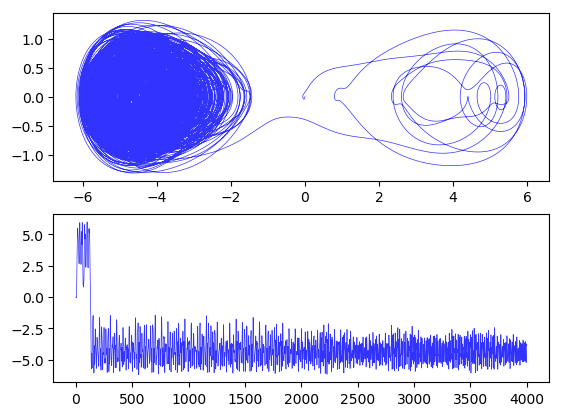

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f648a09e860>

In [19]:
subplot(2, 1, 1)
plot(sol8[10,:],sol8[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol8.t[:], sol8[10,:], color="b",linewidth=0.5,alpha=0.8)

# Diez Osciladores

[0.6908266554752043, 0.14622746785856944, 0.11862351771013592, 0.31527734670655466, 0.5538507710861269, 0.34655978855142316, 0.29709097327595646, 0.07677118209307626, 0.6849806827606687, 0.3895551927383847, 1.0758601773349419]
 

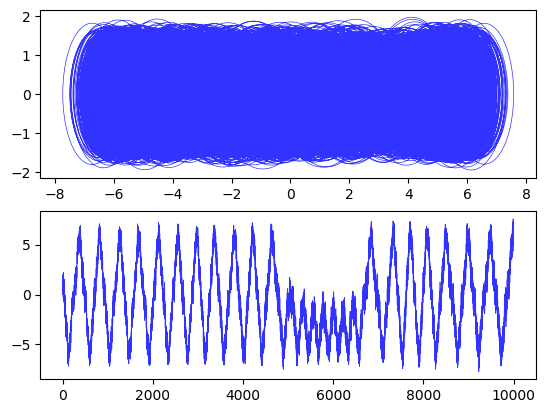

36.802132 seconds (461.51 M allocations: 22.805 GiB, 17.34% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x23f8ef450>

In [49]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(1), 0., 10))
end
function bolz_freq(a)
    return 0.6324555320336759*rand(Truncated(Exponential(1), 0.1, 3.))
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.1,0.1]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
Es=zeros(11)

X0=17.    
P0=1.

time=10000.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[2]=0.6324555320336759-0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=0.6324555320336759-0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=0.6324555320336759-0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=0.6324555320336759-0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=0.6324555320336759+0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=0.6324555320336759+0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=0.6324555320336759+0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=0.6324555320336759+0.1
Es[9]=Es[8]
g[9]=0.04
w[10]=0.6324555320336759+0.1301
Es[10]=bolz_energy()
g[10]=0.021
w[11]=0.6324555320336759+0.13
Es[11]=Es[10]
g[11]=0.023

g=g .* 0. .+ 0.3 /12.
w=w .* 0. .+ 1.
w=(bolz_freq.(w))
println(w)

W=maximum(w)

dts=0.01*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) -q[1]*g[10]*q[10]+p[10]^2. /(2. *m[10])+m[10]*w[10]^2. *q[10]^2. /2. + q[1]^2. *g[10]^2. /(2. *m[10]*w[10]^2.) -q[1]*g[11]*q[11]+p[11]^2. /(2. *m[11])+m[11]*w[11]^2. *q[11]^2. /2. + q[1]^2. *g[11]^2. /(2. *m[11]*w[11]^2.) 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])
initial_position[10], initial_momentum[10],initial_position[11], initial_momentum[11]=initial_sampling(Es[10],w[10],w[11],m[10])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol10 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol10[12,:],sol10[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol10.t[:], sol10[12,:], color="b",linewidth=0.5,alpha=0.8)

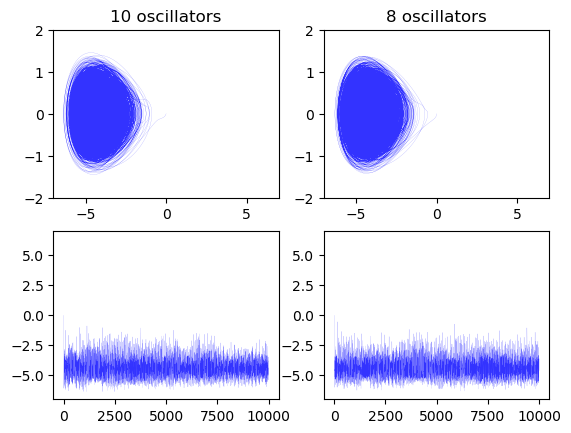

(-7, 7)

In [57]:
subplot(2, 2, 1)
title("10 oscillators")
plot(sol10[12,:],sol10[1,:],color="b",linewidth=0.08,alpha=0.8)
xlim([-7,7])
ylim([-2,2])
subplot(2, 2, 3)
plot(sol10.t[:], sol10[12,:], color="b",linewidth=0.08,alpha=0.8)
ylim([-7,7])
subplot(2, 2, 2)
title("8 oscillators")
plot(sol8[10,:],sol8[1,:],color="b",linewidth=0.08,alpha=0.8)
xlim([-7,7])
ylim([-2,2])
subplot(2, 2, 4)
plot(sol8.t[:], sol8[10,:], color="b",linewidth=0.08,alpha=0.8)
ylim([-7,7])

# Doce osciladores

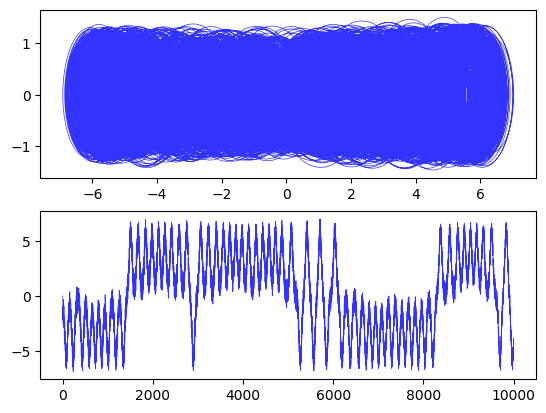

114.107263 seconds (1.66 G allocations: 58.653 GiB, 17.78% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x211563950>

In [48]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function bolz_energy()
    return rand(Truncated(Exponential(1), 0., 10))
end
function bolz_freq(a)
    return 0.6324555320336759*rand(Truncated(Exponential(1), 0.1, 3.))
end

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.1,0.1,0.1,0.1]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
Es=zeros(13)

X0=17.    
P0=1.

time=10000.
#time=1.
tspan=(0., time)
#fig=figure()
m[2:end]=m[2:end] #.*0.1
w[2]=0.6324555320336759-0.1501
Es[2]=bolz_energy()
g[2]=0.005
w[3]=0.6324555320336759-0.15
Es[3]=Es[2]
g[3]=0.01
w[4]=0.6324555320336759-0.1001
Es[4]=bolz_energy()
g[4]=0.015
w[5]=0.6324555320336759-0.1
Es[5]=Es[4]
g[5]=0.02
w[6]=0.6324555320336759+0.2001
Es[6]=bolz_energy()
g[6]=0.025
w[7]=0.6324555320336759+0.2
Es[7]=Es[6]
g[7]=0.03
w[8]=0.6324555320336759+0.1001
Es[8]=bolz_energy()
g[8]=0.035
w[9]=0.6324555320336759+0.1
Es[9]=Es[8]
g[9]=0.04
w[10]=0.6324555320336759+0.1301
Es[10]=bolz_energy()
g[10]=0.021
w[11]=0.6324555320336759+0.13
Es[11]=Es[10]
g[11]=0.023
w[12]=0.6324555320336759+0.1701
Es[12]=bolz_energy()
g[12]=0.031
w[13]=0.6324555320336759+0.17
Es[13]=Es[12]
g[13]=0.037

g=g .* 0. .+ 0.3 /12.
w=w .* 0. .+ 1.
w=(bolz_freq.(w))
#println(w)


W=maximum(w)

dts=0.01*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) -q[1]*g[10]*q[10]+p[10]^2. /(2. *m[10])+m[10]*w[10]^2. *q[10]^2. /2. + q[1]^2. *g[10]^2. /(2. *m[10]*w[10]^2.) -q[1]*g[11]*q[11]+p[11]^2. /(2. *m[11])+m[11]*w[11]^2. *q[11]^2. /2. + q[1]^2. *g[11]^2. /(2. *m[11]*w[11]^2.) -q[1]*g[12]*q[12]+p[12]^2. /(2. *m[12])+m[12]*w[12]^2. *q[12]^2. /2. + q[1]^2. *g[12]^2. /(2. *m[12]*w[12]^2.) -q[1]*g[13]*q[13]+p[13]^2. /(2. *m[13])+m[13]*w[13]^2. *q[13]^2. /2. + q[1]^2. *g[13]^2. /(2. *m[13]*w[13]^2.)
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2], initial_momentum[2],initial_position[3], initial_momentum[3]=initial_sampling(Es[2],w[2],w[3],m[2])
initial_position[4], initial_momentum[4],initial_position[5], initial_momentum[5]=initial_sampling(Es[4],w[4],w[5],m[4])
initial_position[6], initial_momentum[6],initial_position[7], initial_momentum[7]=initial_sampling(Es[6],w[6],w[7],m[6])
initial_position[8], initial_momentum[8],initial_position[9], initial_momentum[9]=initial_sampling(Es[8],w[8],w[9],m[8])
initial_position[10], initial_momentum[10],initial_position[11], initial_momentum[11]=initial_sampling(Es[10],w[10],w[11],m[10])
initial_position[12], initial_momentum[12],initial_position[13], initial_momentum[13]=initial_sampling(Es[12],w[12],w[13],m[12])

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol12 = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
plot(sol12[14,:],sol12[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol12.t[:], sol12[14,:], color="b",linewidth=0.5,alpha=0.8)

In [ ]:
# g=g .* 0. .+ 0.7 /12.
subplot(2, 1, 1)
plot(sol12[14,:],sol12[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol12.t[:], sol12[14,:], color="b",linewidth=0.5,alpha=0.8)

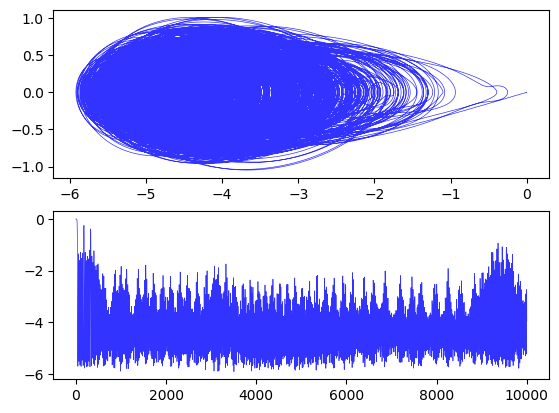

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1f88f2dd0>

In [23]:
#g=g .* 0. .+ 0.5 /12.
subplot(2, 1, 1)
plot(sol12[14,:],sol12[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol12.t[:], sol12[14,:], color="b",linewidth=0.5,alpha=0.8)

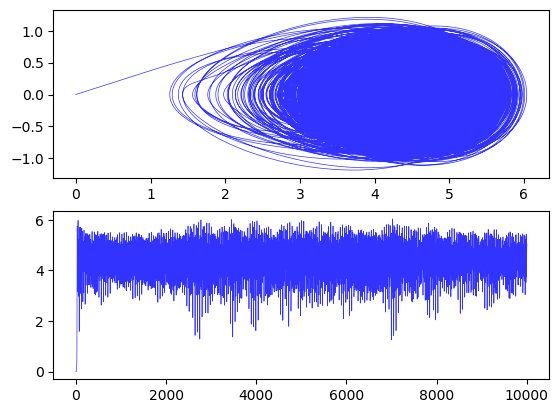

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1f75f2650>

In [20]:
#g=g .* 0. .+ 0.3 /12.
subplot(2, 1, 1)
plot(sol12[14,:],sol12[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol12.t[:], sol12[14,:], color="b",linewidth=0.5,alpha=0.8)

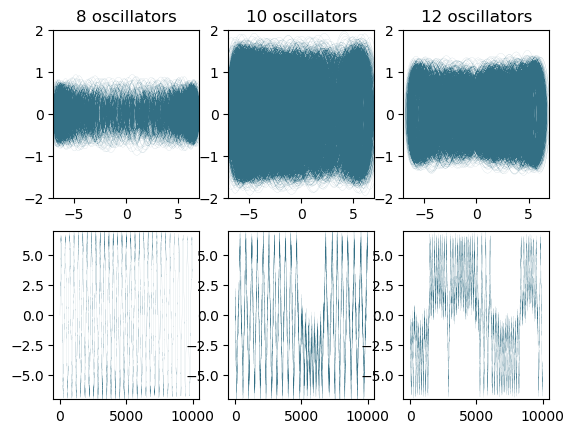

In [51]:
subplot(2, 3, 1)
title("8 oscillators")
plot(sol8[10,:],sol8[1,:],color=(0.,75/255,102/255),linewidth=0.05,alpha=0.8)
xlim([-7,7])
ylim([-2,2])
subplot(2, 3, 4)
plot(sol8.t[:], sol8[10,:], color=(0.,75/255,102/255),linewidth=0.05,alpha=0.8)
ylim([-7,7])


subplot(2, 3, 2)
title("10 oscillators")
plot(sol10[12,:],sol10[1,:],color=(0.,75/255,102/255),linewidth=0.05,alpha=0.8)
xlim([-7,7])
ylim([-2,2])
subplot(2, 3, 5)
plot(sol10.t[:], sol10[12,:], color=(0.,75/255,102/255),linewidth=0.05,alpha=0.8)
ylim([-7,7])

subplot(2, 3, 3)
title("12 oscillators")
plot(sol12[14,:],sol12[1,:],color=(0.,75/255,102/255),linewidth=0.05,alpha=0.8)
xlim([-7,7])
ylim([-2,2])
subplot(2, 3, 6)
plot(sol12.t[:], sol12[14,:], color=(0.,75/255,102/255),linewidth=0.05,alpha=0.8)
ylim([-7,7])
savefig("ohm_simetria_freqs_boltz_g_bueno.png")

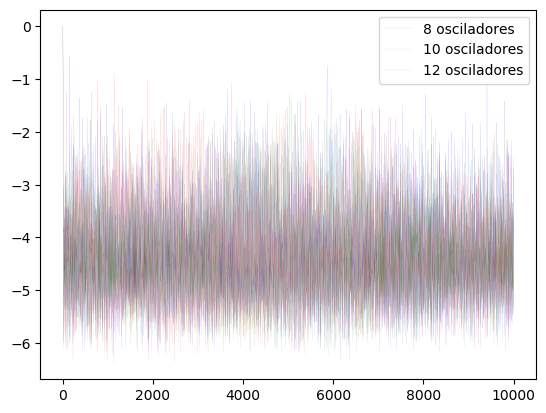

PyObject <matplotlib.legend.Legend object at 0x210ebbf10>

In [75]:
plot(sol8.t[:], sol8[10,:], color="b",linewidth=0.05,alpha=0.8,label="8 osciladores")
plot(sol10.t[:], sol10[12,:], color="r",linewidth=0.05,alpha=0.8,label="10 osciladores")
plot(sol12.t[:], -1*sol12[14,:], color="g",linewidth=0.05,alpha=0.8,label="12 osciladores")
legend()